# Text Classifiaction project:-
In this project I use ML to determine in which class wheater this message belongs to. This is mini project as real project has 20 classes and about 20,000 files system in not capable to run on such project so in mini project only 2 classes and 2000 files are their. 

Mulinomial naive bayes is capable of handling files having large features so this project will do same. We take message collect from different sorces and classified them using naive bayes larger the grammer included large the accuracy. 

In [1]:
import os #os is used to open files that are in pc
import re #reshape the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = r"C:/Users/DAVKAUR/Data Science/Text Classification Project/Text Classification project"
datasets = os.listdir(path) #list of all the files as this is mini project only 2 classes are their spam and not spam
count = 0
X = [] #it will huge 2d array containing messages
Y = [] #it will contain class
for folders in datasets:
    path2 = path +"/"+ folders #Files inside the class 
    files = os.listdir(path2) #path of files 
    for file in files:
        path3 =  path2 + "/" + file #path of txt file
        with open(path3) as data:
            X.append(data.read()) #message aur txt inside files
            Y.append(folders)
    
print(Y)

['Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'Not spam', 'No

In [3]:
len(X) #number of message 

2000

In [4]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because",
           "been","before","being","below","between","both","but","by","could","did","do","does","doing","down",
           "during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
           "here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if",
           "in","into","is","it","it's","its","itself","let's","me","more","most","my","myself","nor","of","on","once",
           "only","or","other","ought","our","ours","ourselves","out","over","own","same","she","she'd","she'll",
           "she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then",
           "there","there's","these","they","they'd","they'll","they're","they've","this","those","through","to","too",
           "under","until","up","very","was","we","we'd","we'll","we're","we've","were","what","what's","when",
           "when's","where","where's","which","while","who","who's","whom","why","why's","with","would","you","you'd",
           "you'll","you're","you've","your","yours","yourself","yourselves", "I"]

#As some words are very much common they doenst contain useful information rather create problem these are called stop words
# We should ignore these words

In [5]:
text_dict ={} #Dict containg words and freq so most occured word can be seperate out and make them feature also know as grammer of Text classifiaction
#As this is mini project it will only contain 200 words but it can be more than 2000 depends on graph
for i in X:
    array = ""
    array = i.split()
    for k in array:
        if k not in stop_word: #removing stop words
            if len(k) != 1:
                text_dict[k] = text_dict.get(k, 0)+1
text_dict

{'Xref:': 589,
 'cantaloupe.srv.cs.cmu.edu': 588,
 'alt.atheism:49960': 1,
 'alt.atheism.moderated:713': 1,
 'news.answers:7054': 1,
 'alt.answers:126': 1,
 'Path:': 2002,
 'cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew': 1,
 'From:': 2069,
 'mathew': 125,
 '<mathew@mantis.co.uk>': 78,
 'Newsgroups:': 2011,
 'alt.atheism,alt.atheism.moderated,news.answers,alt.answers': 7,
 'Subject:': 2037,
 'Alt.Atheism': 20,
 'FAQ:': 28,
 'Atheist': 25,
 'Resources': 16,
 'Summary:': 64,
 'Books,': 7,
 'addresses,': 8,
 'music': 10,
 '--': 1320,
 'anything': 241,
 'related': 57,
 'atheism': 126,
 'Keywords:': 206,
 'FAQ,': 29,
 'atheism,': 34,
 'books,': 29,
 'music,': 5,
 'fiction,': 9,
 'contacts': 4,
 'Message-ID:': 2001,
 '<19930329115719@mantis.co.uk>': 2,
 'Date:': 2008,
 'Mon,': 168,
 '29': 98,
 'Mar': 20,
 '1993': 1517,
 '11:57:19': 2,


In [6]:
text_dict_count = []
text_dict_word = []
text_dict_sort = sorted(text_dict.items(), key=lambda x:x[1], reverse = True)[10:] #Sorting the dict but removinfg most occuring world as most of are stop words or repeat in every msg
for i in range(200):
    text_dict_count.append(text_dict_sort[i][1])
    text_dict_word.append(text_dict_sort[i][0])
text_dict_sort

[('Message-ID:', 2001),
 ('Apr', 1979),
 ('Organization:', 1923),
 ('GMT', 1766),
 ('writes:', 1571),
 ('Re:', 1524),
 ('1993', 1517),
 ('In', 1449),
 ('will', 1414),
 ('References:', 1394),
 ('--', 1320),
 ('article', 1314),
 ('one', 1255),
 ('If', 1107),
 ("don't", 1089),
 ('It', 1024),
 ('no', 1024),
 ('Sender:', 957),
 ('This', 923),
 ('like', 914),
 ('people', 910),
 ('University', 889),
 ('image', 855),
 ('know', 854),
 ('just', 840),
 ('think', 835),
 ('alt.atheism', 827),
 ('>>', 802),
 ('say', 756),
 ('comp.graphics', 722),
 ('get', 703),
 ('93', 672),
 ('also', 668),
 ('many', 616),
 ('use', 609),
 ("I'm", 606),
 ('Xref:', 589),
 ('cantaloupe.srv.cs.cmu.edu', 588),
 ('NNTP-Posting-Host:', 587),
 ('You', 583),
 ('even', 535),
 ('file', 531),
 ('JPEG', 529),
 ('see', 528),
 ('may', 523),
 ('make', 518),
 ('good', 488),
 ('it.', 487),
 ('much', 484),
 ('God', 465),
 ('believe', 450),
 ('need', 446),
 ('find', 442),
 ('time', 433),
 ('For', 429),
 ('must', 427),
 ('What', 420),
 

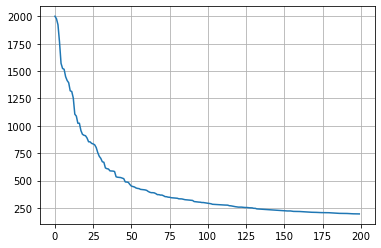

In [7]:
plt.plot(text_dict_count[:200]) #Actually it will not slice it should be complete
plt.grid()
plt.show()

In [8]:
#List of how many time word is repated in every message
test_X = []
for i in range(len(X)):
    count = 0
    array = np.zeros(200)
    for j in X[i].split():
        for k in range(len(text_dict_word)):
            if j == text_dict_word[k]:
                array[k] += 1
    test_X.append(array)

In [9]:
#just to check is sum of all the msg is equal or not 
#unnecessary part
for i in range(200):
    Sum = 0
    for j in range(len(test_X)):
        Sum += test_X[j][i]
    print(int(text_dict_count[i] - Sum), end=", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
df = pd.DataFrame(test_X, columns = text_dict_word) #creating a df so no need to run the func everytime
df["Output"] = Y
df

,Message-ID:,Apr,Organization:,GMT,writes:,Re:,1993,In,will,References:,...,come,argument,now,agree,He,religious,"is,",got,---,Output
0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,Not spam
1,1.0,1.0,1.0,2.0,0.0,0.0,3.0,5.0,7.0,0.0,...,0.0,0.0,0.0,1.0,2.0,31.0,2.0,0.0,0.0,Not spam
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not spam
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Not spam
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spam
1996,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spam
1997,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spam
1998,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spam


In [11]:
df.to_csv("Text file dataset.csv", index = False) #saving to pc so no need to re run the whole code

In [12]:
df = pd.read_csv("Text file dataset.csv")
df.head()

,Message-ID:,Apr,Organization:,GMT,writes:,Re:,1993,In,will,References:,...,come,argument,now,agree,He,religious,"is,",got,---,Output
0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,Not spam
1,1.0,1.0,1.0,2.0,0.0,0.0,3.0,5.0,7.0,0.0,...,0.0,0.0,0.0,1.0,2.0,31.0,2.0,0.0,0.0,Not spam
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not spam
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Not spam
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not spam


#### Normal ML codes nowwards

In [13]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

In [14]:
x_train, x_test, y_train, y_test = TTS(X, Y)

In [18]:
model = MNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test), model.score(x_train, y_train)

(0.98, 0.968)

In [16]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

    Not spam       0.98      0.98      0.98       247
        Spam       0.98      0.98      0.98       253

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[243   4]
 [  6 247]]
